# Evaluar el modelo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Caso de regresión

In [2]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

batch_size = 25

In [7]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8),replace=False)

In [8]:
train_idx

array([119, 130,  70, 136,   3, 162, 185,  95,  36,  39, 118,  77,  20,
       125,  78, 124,  45, 194, 112, 105, 177, 196, 134, 132, 117, 188,
       184,  57, 164,  71,  99, 102, 108,  11, 149,   8, 151, 181, 171,
       155, 131, 180, 133,  27,  42,  72,   7,  22,  97,   4, 120, 179,
        75,  28,  80, 152,  74, 109, 147,   6, 148,  55,  41,  35, 191,
       160, 128, 183, 157, 142,  52, 126, 187,  40,  91,  56, 143, 156,
        23, 172, 107,  21,  65, 159, 168,  89,  34,  69, 138,   5, 199,
       144,  26,  64,  16,  47,  67,  19,  73,  44, 173, 158,  61, 122,
        81, 174, 154, 163,  90, 166, 190,  48, 106, 197,  92,  82, 121,
        25,   9, 175,  12, 176, 115,  66,  30,  88,   0,  14,  49, 123,
        33, 146, 167,   1, 178, 111, 153,  85, 137,  37,  93, 139, 195,
       103, 145, 110, 165,  43, 169, 141, 114,   2, 170,  60, 129,  24,
        68, 140,  62,  53])

In [9]:
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [10]:
test_idx

array([135,  10,  13,  15,  17,  18, 150,  29,  31,  32, 161,  38,  46,
        50,  51,  54, 182,  58,  59, 186, 189,  63, 192, 193, 198,  76,
        79,  83,  84,  86,  87,  94,  96,  98, 100, 101, 104, 113, 116,
       127])

In [11]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [12]:
my_prediction = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_prediction-y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [13]:
for i in range(200):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    if (i+1)%20==0:
        print('Paso #'+str(i+1)+ ", A="+str(session.run(A))+", Loss ="+
              str(session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})))

Paso #20, A=[[5.218138]], Loss =22.296453
Paso #40, A=[[7.8419075]], Loss =6.535862
Paso #60, A=[[8.970312]], Loss =1.3344779
Paso #80, A=[[9.482477]], Loss =0.97674805
Paso #100, A=[[9.693749]], Loss =0.76281387
Paso #120, A=[[9.81797]], Loss =1.1814262
Paso #140, A=[[9.808198]], Loss =1.0027936
Paso #160, A=[[9.848007]], Loss =0.6504418
Paso #180, A=[[9.878943]], Loss =1.8072009
Paso #200, A=[[9.857082]], Loss =0.72138345


#### Evaluación del modelo con MSE

In [14]:
mse_train = session.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
mse_test = session.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
print("MSE en el conjunto de entrenamiento "+str(np.round(mse_train, 3)))
print("MSE en el conjunto de testing "+str(np.round(mse_test, 3)))

MSE en el conjunto de entrenamiento 0.907
MSE en el conjunto de testing 1.193


### Caso de clasificación

In [15]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [16]:
batch_size = 25
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(2,1,100)))
y_vals = np.concatenate((np.repeat(0.0, 100), np.repeat(1.0,100)))

x_data = tf.placeholder(shape=[1,None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1,None], dtype = tf.float32)

In [17]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [18]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [20]:
my_prediction = tf.add(x_data, A)
init = tf.global_variables_initializer()
session.run(init)

In [21]:
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction, labels=y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_optim.minimize(xentropy)

In [22]:
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_idx]]
    rand_y = [y_vals_train[rand_idx]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+
             "Loss = "+str(session.run(xentropy, feed_dict={x_data: rand_x, y_target:rand_y})))

Paso #100, A = [8.811653]Loss = 3.5225556
Paso #200, A = [6.309709]Loss = 1.509116
Paso #300, A = [3.972089]Loss = 1.446823
Paso #400, A = [2.19627]Loss = 0.4496706
Paso #500, A = [1.2002519]Loss = 0.3243299
Paso #600, A = [0.63023496]Loss = 0.24670944
Paso #700, A = [0.3356251]Loss = 0.45328826
Paso #800, A = [0.16987437]Loss = 0.18514667
Paso #900, A = [0.05538499]Loss = 0.18054068
Paso #1000, A = [0.02011899]Loss = 0.14436768
Paso #1100, A = [-0.00971408]Loss = 0.20711802
Paso #1200, A = [-0.04051819]Loss = 0.22625959
Paso #1300, A = [-0.04264131]Loss = 0.23210616
Paso #1400, A = [-0.03250437]Loss = 0.28574723
Paso #1500, A = [-0.02166368]Loss = 0.19554186
Paso #1600, A = [-0.03728257]Loss = 0.13040085
Paso #1700, A = [-0.05607908]Loss = 0.22651196
Paso #1800, A = [-0.04378337]Loss = 0.1466381
Paso #1900, A = [-0.04133976]Loss = 0.2771842
Paso #2000, A = [-0.04045162]Loss = 0.256596


#### Evaluar el modelo con la precisión (Accuracy)

In [23]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
acc_train = session.run(accuracy, feed_dict={x_data:[x_vals_train], y_target: [y_vals_train]})
acc_test = session.run(accuracy, feed_dict={x_data:[x_vals_test], y_target: [y_vals_test]})

In [26]:
print("Precisión en el conjunto de entrenamiento: "+str(acc_train))
print("Precisión en el conjunto de testing: "+ str(acc_test))

Precisión en el conjunto de entrenamiento: 0.9375
Precisión en el conjunto de testing: 0.925


#### Visualización de los modelos

In [27]:
A_result = session.run(A)
A_result

array([-0.04045162], dtype=float32)

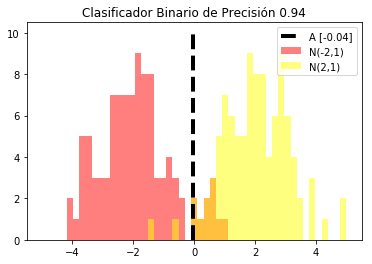

In [29]:
bins = np.linspace(-5,5,50)
plt.hist(x_vals[0:100], bins, alpha=0.5, label = "N(-2,1)", color="red")
plt.hist(x_vals[100:200], bins, alpha=0.5, label="N(2,1)", color="yellow")
plt.plot((A_result, A_result), (0, 10), "k--", linewidth = 4, label = "A "+str(np.round(A_result,2)))
plt.legend(loc="upper right")
plt.title("Clasificador Binario de Precisión "+str(np.round(acc_train,2)))
plt.show()